In [29]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import plotly.express as px

# Loading and EDA

In [30]:
# Load Dataset + Quick Glance
df = pd.read_csv(r'C:\Repositories\DI-Bootcamp\Week9\Day3\Happiness\2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [31]:
# Checking shape and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [32]:
# Quick Glance at Numeric Columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [33]:
# Quick Glance at Categorical Values
df_non_numeric = df.select_dtypes(exclude=['number'])

for col in df_non_numeric:
    print(df_non_numeric[col].value_counts(dropna=False), '\n')

Country
Switzerland    1
Iceland        1
Denmark        1
Norway         1
Canada         1
              ..
Rwanda         1
Benin          1
Syria          1
Burundi        1
Togo           1
Name: count, Length: 158, dtype: int64 

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64 



## Initial Insights

### Regional

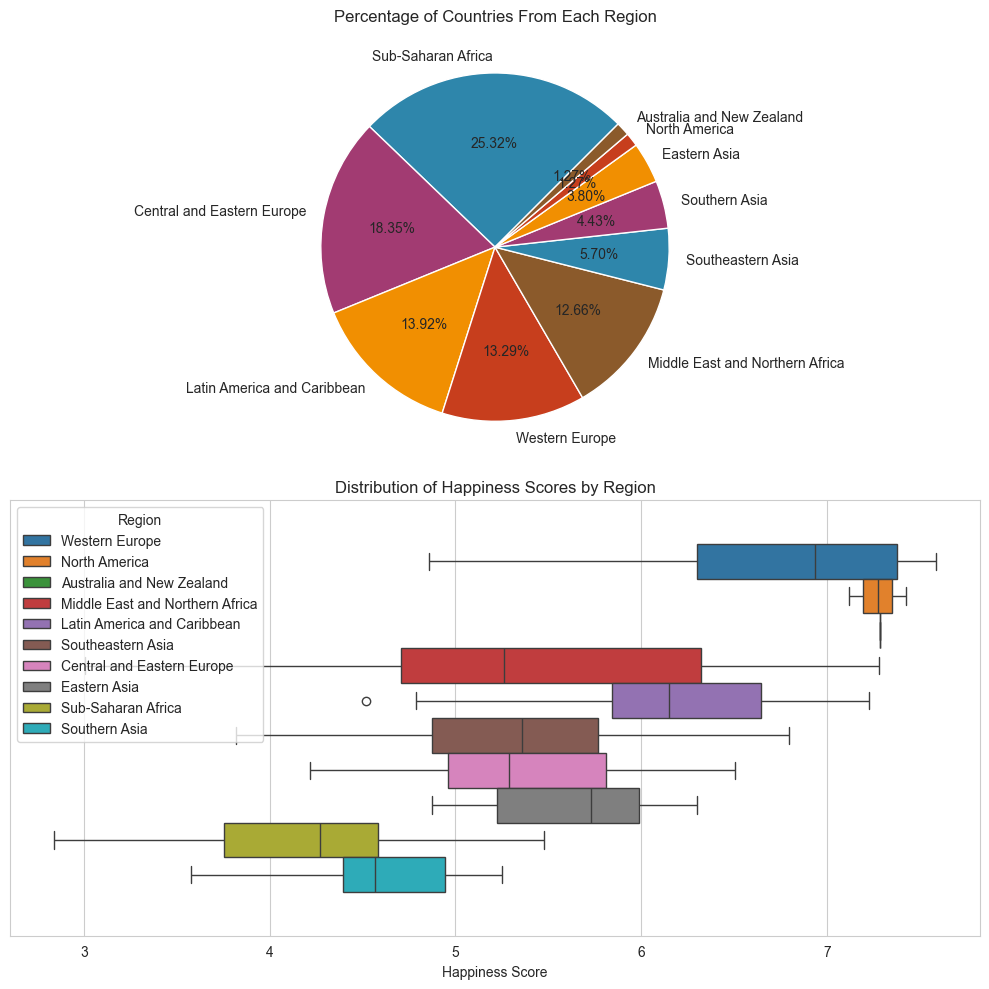

In [34]:
# Basic Plots to Visualize Key Statistics
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

# Left Plot: Percentage of Countries by Region
region_count = df['Region'].value_counts()
ax1.pie(region_count, labels=region_count.index, autopct='%1.2f%%', startangle=45, 
        colors=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8B5A2B'])
ax1.set_title('Percentage of Countries From Each Region')

# Right Plot: Visualizing Regions by Happiness
sns.boxplot(data=df, x='Happiness Score', hue='Region', orient='h', ax=ax2, legend=True)
ax2.set_title('Distribution of Happiness Scores by Region')

plt.tight_layout()
plt.show()

### Country

In [51]:
# Quick Look at Happiness Score by GDP per Country
fig = px.scatter(df, 
           x='Happiness Score', 
           y='Economy (GDP per Capita)', 
           hover_name='Country',
           color='Region',
           title='Economic Impact on Happiness Score'
)

fig.update_layout(
    font=dict(size=14),
    showlegend=False
)

fig.show()